In [1]:
from family_analysis import read_db_single, build_df_families_proteins
from utils import list_valid_families

In [2]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= (8, 6)

In [3]:
from plot_utils import set_spanish_locale, format_mil_spanish, matplot_formatter_mil_spanish

In [4]:
set_spanish_locale()

In [5]:
dataset_valid_families = sorted(list_valid_families("output/family_datasets"))

In [6]:
# Quiro obtener la clasificacion de cada familia, en Globulares o Repetitivas
# df_family_classification = pd.read_csv("family_classification.csv", sep=";")
df_family_classification = pd.read_csv("family_classification_2018.csv", sep=";")
df_family_classification.head()

,FamilyName,Type
0,ABCtran,Globular
1,CorA,Globular
2,GDCP,Globular
3,Globin,Globular
4,Glycohydro19,Globular


In [7]:
# Get families classification
families_repeat = set(df_family_classification[ df_family_classification.Type == "Repeat" ]['FamilyName'])
families_repeat.add("NEWAnk")
families_repeat = { f for f in families_repeat if f in dataset_valid_families }

# families_repeat.add("ank")
families_globular = set(df_family_classification[ df_family_classification.Type == "Globular" ]['FamilyName'])
families_globular = { f for f in families_globular if f in dataset_valid_families }


In [8]:
# Is there a family without classification?
for family in dataset_valid_families:
    if family not in families_repeat and family not in families_globular:
        print(family)

ank


In [9]:
df_families_proteins_repeat = build_df_families_proteins(families_repeat)
df_families_proteins_globular = build_df_families_proteins(families_globular)

In [10]:
print("#Repeats:   ", len(set(df_families_proteins_repeat["family"])))
print("#Globulares:", len(set(df_families_proteins_globular["family"])))

#Repeats:    26
#Globulares: 20


In [13]:
# Boxplot sorted by medians
# https://stackoverflow.com/questions/21912634/how-can-i-sort-a-boxplot-in-pandas-by-the-median-values

def _build_boxplot_family_proteinlen_df(df, ascending_sort=True):
    grouped = df.groupby(["family"])
    df2 = pd.DataFrame({col:vals['protein_len'] for col,vals in grouped})
    meds = df2.median().sort_values(ascending=ascending_sort)
    df2 = df2[meds.index]
    return df2
    
def plot_protein_len_boxplot_sorted(df, repeat_or_globular, ylim, with_outlier):
    assert repeat_or_globular in ["repeat", "globular"]
    df2 = _build_boxplot_family_proteinlen_df(df)

    # Distribucion del largo de las proteinas por cada familia
    ax = df2.boxplot(
        grid=True, 
        showfliers=with_outlier, # Outliers
        rot=90, 
        figsize=(10, 4),
    )
   
    ax.set_ylim(0, ylim)
    ax.set_ylabel("Largo de secuencia")
    ax.set_xlabel("Familia")
    ax.get_yaxis().set_major_formatter(matplot_formatter_mil_spanish())
    fig = ax.get_figure()
    return fig

def plot_protein_len_boxplot_sorted_horizontal(df, repeat_or_globular, xlim, with_outlier):
    assert repeat_or_globular in ["repeat", "globular"]
    df2 = _build_boxplot_family_proteinlen_df(df, ascending_sort=False)

    # Distribucion del largo de las proteinas por cada familia
    ax = df2.boxplot(
        grid=True, 
        showfliers=with_outlier, # Outliers
        rot=0, 
        figsize=(7, 8),
        vert=False,
        flierprops={'marker': 'o', 'markersize': 2, 'markeredgecolor': 'grey'}
    )
   
    ax.set_xlim(0, xlim)
    ax.set_xlabel("Largo de secuencia")
    ax.set_ylabel("Familia")
    ax.get_xaxis().set_major_formatter(matplot_formatter_mil_spanish())
    fig = ax.get_figure()
    
    return fig

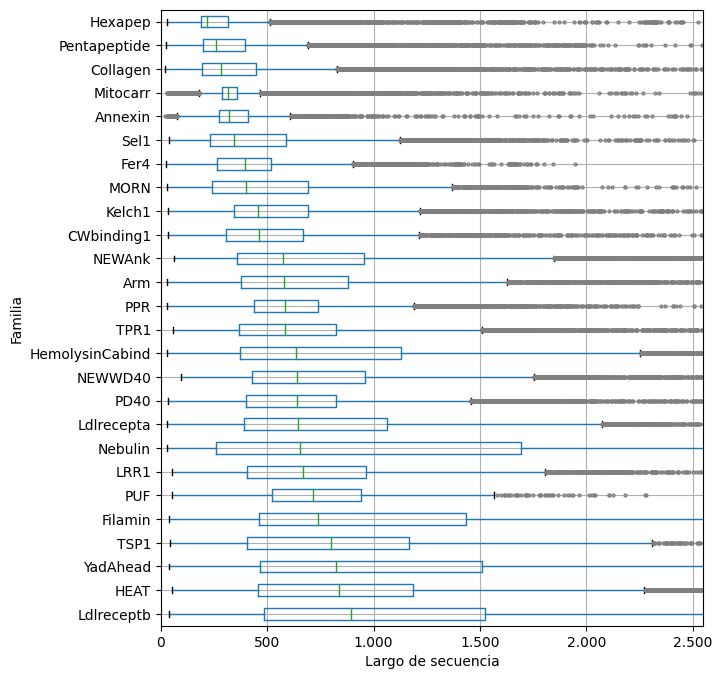

In [15]:
fig = plot_protein_len_boxplot_sorted_horizontal(df_families_proteins_repeat, "repeat", 2550, True)
# fig.savefig('imagenes/families/protein_length_by_repeat_family_sorted_horizontal.pdf', bbox_inches = "tight")

In [16]:
df_comparables = df_families_proteins_repeat[df_families_proteins_repeat.family.isin(["NEWAnk", "TPR1", "LRR1"])]
df_comparables.groupby('family').describe()

protein_len                                                           
             count        mean         std   min    25%    50%    75%     max
family                                                                       
LRR1       33060.0  698.320932  361.186957  53.0  403.0  669.0  965.0  5227.0
NEWAnk     32169.0  717.676676  498.675876  63.0  357.0  576.0  954.0  7268.0
TPR1       36389.0  649.404490  386.781128  58.0  369.0  585.0  825.0  4489.0

In [17]:
def protein_len_medians_df(df):
    return df.groupby('family').agg(median=('protein_len', 'median')).reset_index().sort_values(by='median')

In [18]:
protein_len_medians_df(df_families_proteins_repeat)

,family,median
8,Hexapep,217.0
21,Pentapeptide,261.0
3,Collagen,283.0
14,Mitocarr,316.0
0,Annexin,321.0
22,Sel1,345.0
4,Fer4,397.0
13,MORN,401.0
9,Kelch1,456.0
2,CWbinding1,464.0


In [19]:
protein_len_medians_df(df_families_proteins_globular)

,family,median
11,PIN,136.0
5,GreAGreB,158.0
9,PBP,182.0
17,TerB,185.0
3,Globin,233.0
18,Thaumatin,249.0
7,MIP,255.0
16,Rhomboid,266.0
4,Glycohydro19,268.0
1,CorA,341.0


In [17]:
# fig = plot_protein_len_boxplot(df_families_proteins_globular, "globular")

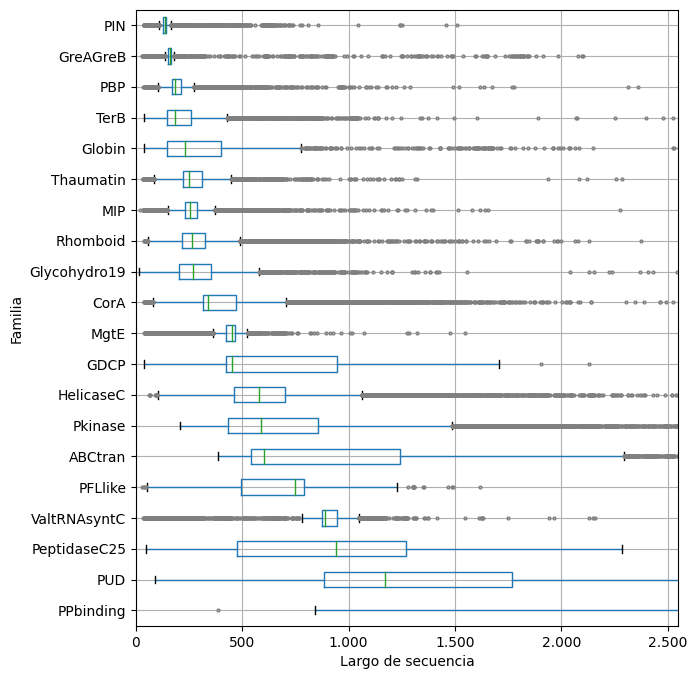

In [23]:
fig = plot_protein_len_boxplot_sorted_horizontal(df_families_proteins_globular, "globular", 2550, True)
# fig.savefig('imagenes/families/protein_length_by_globular_family_sorted_horizontal.pdf', bbox_inches = "tight")

In [19]:
# df_families_proteins_repeat.groupby('family').count()

In [28]:
def plot_protein_amount_sorted(df, repeat_or_globular, ylim):
    assert repeat_or_globular in ["repeat", "globular"]
    # Cantidad de proteinas por cada familia
    ax = df.groupby('family').count().sort_values(by='protein_name').plot(
        kind='bar', 
        y='protein_name',
        legend=False,
        label=None,
        grid=True,
        figsize=(10,4))

    
    ax.set_ylabel("Cantidad de secuencias")
    ax.set_xlabel("Familia")
    ax.set_ylim(0, ylim)
    
    ax.get_yaxis().set_major_formatter(matplot_formatter_mil_spanish())
    
    fig = ax.get_figure()
    
    return fig

In [29]:
df_families_proteins_repeat.groupby('family').count().sort_values(by='protein_name')

,protein_name,protein_len
family,,
Nebulin,1062,1062
Annexin,3424,3424
YadAhead,3933,3933
PUF,3956,3956
Filamin,4137,4137
Ldlreceptb,4233,4233
CWbinding1,5403,5403
MORN,8079,8079
TSP1,11296,11296


In [30]:
df_families_proteins_globular.groupby('family').count().sort_values(by='protein_name')

,protein_name,protein_len
family,,
PUD,924,924
PeptidaseC25,1392,1392
Thaumatin,2827,2827
PFLlike,3068,3068
Glycohydro19,3363,3363
PPbinding,4230,4230
ValtRNAsyntC,4782,4782
MgtE,5518,5518
Globin,6606,6606


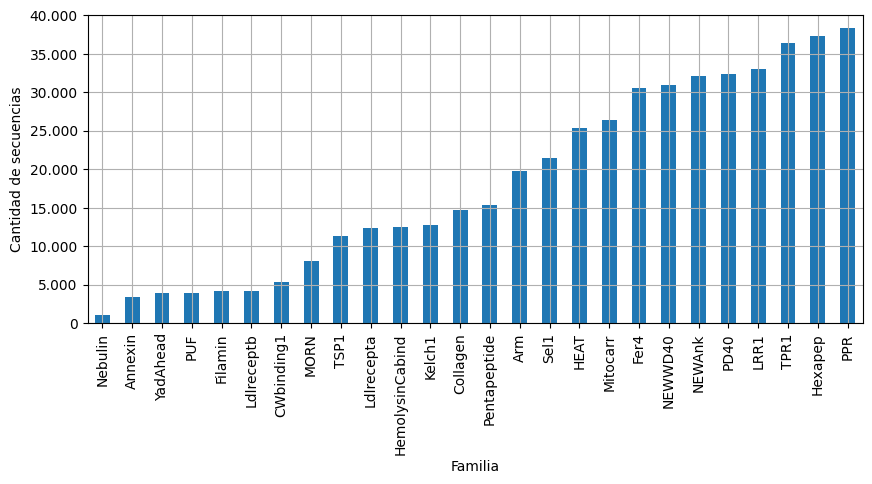

In [36]:
fig = plot_protein_amount_sorted(df_families_proteins_repeat, "repeat", 40000)
# fig.savefig('imagenes/families/protein_amount_by_repeat_family_sorted.pdf', bbox_inches = "tight")

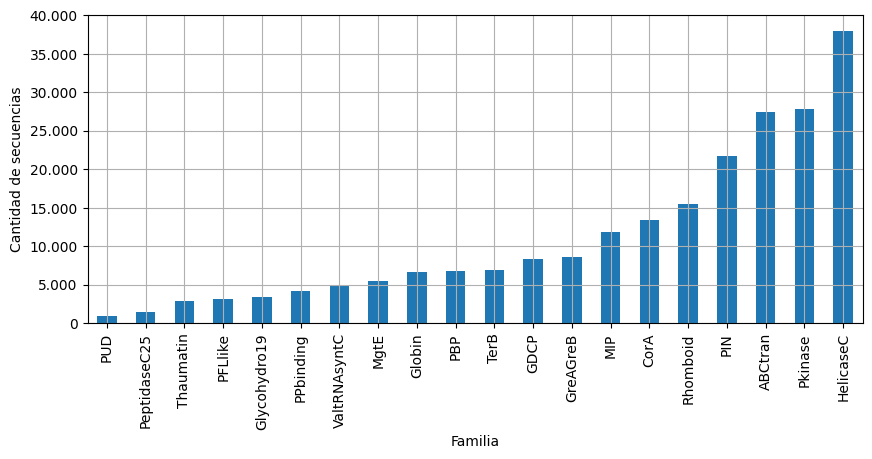

In [38]:
fig = plot_protein_amount_sorted(df_families_proteins_globular, "globular", 40000)
# fig.savefig('imagenes/families/protein_amount_by_globular_family_sorted.pdf', bbox_inches = "tight")

In [25]:
"""
Es interesante que NEWAnk tiene cantidad de proteinas similar, y la distribucion de tamaños es similar,
pero al calcular reglas con los mismos parametros, en TPR1 casi no obtengo nada. 
Tengo que bajar bastante el support y confidence para recien empezar a obtener algo.

Tengo que buscar que otras familias son "comparables" a NEWAnk, y calcular las reglas.
Tambien, entender como se obtiene el dataset TPR1, quiza otro dataset de TPR permite mejor generacion
"""


'\nEs interesante que NEWAnk tiene cantidad de proteinas similar, y la distribucion de tamaños es similar,\npero al calcular reglas con los mismos parametros, en TPR1 casi no obtengo nada. \nTengo que bajar bastante el support y confidence para recien empezar a obtener algo.\n\nTengo que buscar que otras familias son "comparables" a NEWAnk, y calcular las reglas.\nTambien, entender como se obtiene el dataset TPR1, quiza otro dataset de TPR permite mejor generacion\n'

In [26]:
# Quiero hacer unas comparaciones entre las proteinas de ank vs las de NEWAnk

In [32]:
df_ank_newank = build_df_families_proteins(["ank", "NEWAnk"])

In [34]:
df_ank_newank.groupby('family').describe()

protein_len                                                            
             count        mean         std   min    25%    50%    75%      max
family                                                                        
NEWAnk     32169.0  717.676676  498.675876  63.0  357.0  576.0  954.0   7268.0
ank        38051.0  631.222123  525.390060  30.0  273.0  493.0  828.0  11957.0

In [38]:
df_ank = df_ank_newank[ df_ank_newank['family'] == 'ank' ]

In [37]:
df_newank = df_ank_newank[ df_ank_newank['family'] == 'NEWAnk' ]

In [41]:
proteins_ank = set(df_ank.protein_name)

In [42]:
proteins_newank = set(df_newank.protein_name)

In [49]:
proteins_intersection = proteins_ank.intersection(proteins_newank)

In [50]:
print("ank         ", len(proteins_ank))
print("NEWAnk      ", len(proteins_newank))
print("Intersection", len(proteins_intersection))

ank          38051
NEWAnk       32169
Intersection 9463


In [72]:
df_intersection = df_newank[ df_newank.protein_name.isin(proteins_intersection) ]
df_intersection.loc[df_intersection.index, 'family'] = 'intersection'

In [80]:
# df_intersection.describe()

In [79]:
pd.concat([df_intersection, df_ank_newank]).groupby('family').describe()

protein_len                                                     \
                   count        mean         std   min    25%    50%    75%   
family                                                                        
NEWAnk           32169.0  717.676676  498.675876  63.0  357.0  576.0  954.0   
ank              38051.0  631.222123  525.390060  30.0  273.0  493.0  828.0   
intersection      9463.0  673.636373  467.943425  63.0  338.0  545.0  885.5   

                       
                  max  
family                 
NEWAnk         7268.0  
ank           11957.0  
intersection   4628.0